# Tools We'll Need

In [796]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# What Does Our Data Look Like?

In [797]:
titanic_df = pd.read_csv('titanic.csv')

In [798]:
# Randomly sort the data, this'll be important later on
titanic_df = titanic_df.sample(frac = 1)

In [799]:
titanic_df.reset_index(drop=True, inplace=True)

In [800]:
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Harder, Mr. George Achilles",male,25.0,1.0,0.0,11765,55.4417,E50,C,5,NaN,"Brooklyn, NY"
1,1.0,0.0,"Colley, Mr. Edward Pomeroy",male,47.0,0.0,0.0,5727,25.5875,E58,S,NaN,NaN,"Victoria, BC"
2,1.0,1.0,"Stengel, Mr. Charles Emil Henry",male,54.0,1.0,0.0,11778,55.4417,C116,C,1,NaN,"Newark, NJ"
3,3.0,0.0,"Lam, Mr. Len",male,NaN,0.0,0.0,1601,56.4958,NaN,S,NaN,NaN,NaN
4,3.0,0.0,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0.0,0.0,SOTON/O.Q. 3101314,7.2500,NaN,S,NaN,NaN,NaN
5,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY"
6,1.0,0.0,"White, Mr. Richard Frasar",male,21.0,0.0,1.0,35281,77.2875,D26,S,NaN,169.0,"Brunswick, ME"
7,3.0,0.0,"Vendel, Mr. Olof Edvin",male,20.0,0.0,0.0,350416,7.8542,NaN,S,NaN,NaN,NaN
8,3.0,0.0,"Jensen, Mr. Niels Peder",male,48.0,0.0,0.0,350047,7.8542,NaN,S,NaN,NaN,NaN
9,1.0,1.0,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1.0,0.0,113789,52.0000,NaN,S,8,NaN,"New York, NY"


# Clean the dataset

In [801]:
#Select a subset of the columns
titanic_df = titanic_df[['pclass', 'survived', 'sex', 'age', 'fare']]

In [802]:
#Fill the NaN with -1
titanic_df.fillna(-1, inplace = True)

In [803]:
#A dictionary in python
sex_dict = {'male': 0, 'female': 1, -1: -1}

In [804]:
#Our first look at the magic of "apply"
titanic_df.sex = titanic_df.sex.apply(lambda x: sex_dict[x])

In [805]:
#How bad is our missing data situation?
for field in titanic_df.columns:
    print field, sum(titanic_df[field] == -1)

pclass 1
survived 1
sex 1
age 264
fare 2


In [806]:
#Is the fact that age is not reported relevant?
no_age_df = titanic_df[titanic_df.age == -1]
yes_age_df = titanic_df[titanic_df.age != -1]

In [807]:
for field in ['fare', 'sex', 'survived', 'pclass']:
    print field
    print 'Missing Age: ', no_age_df[field].mean()
    print 'Present Age: ', yes_age_df[field].mean()

fare
Missing Age:  19.7444431818
Present Age:  36.6500515296
sex
Missing Age:  0.291666666667
Present Age:  0.370936902486
survived
Missing Age:  0.272727272727
Present Age:  0.408221797323
pclass
Missing Age:  2.62878787879
Present Age:  2.20745697897


In [808]:
#Make a decision about what to do about NaN
titanic_df = titanic_df[(titanic_df.age != -1)&(titanic_df.survived != -1)&(titanic_df.sex != -1)&(titanic_df.fare != -1)&(titanic_df.pclass != -1)]

#More Elegant
#titanic_df[(titanic_df.T != -1).all()]

In [809]:
titanic_df

,pclass,survived,sex,age,fare
0,1.0,1.0,0,25.0,55.4417
1,1.0,0.0,0,47.0,25.5875
2,1.0,1.0,0,54.0,55.4417
5,1.0,1.0,1,38.0,71.2833
6,1.0,0.0,0,21.0,77.2875
7,3.0,0.0,0,20.0,7.8542
8,3.0,0.0,0,48.0,7.8542
9,1.0,1.0,1,35.0,52.0000
10,1.0,0.0,0,54.0,51.8625
11,3.0,1.0,1,33.0,20.5750


In [810]:
#Again reset the index
titanic_df.reset_index(drop=True, inplace = True)

# What's correlated with Survival?

In [811]:
#Set up our correlation matrix
correlation_matrix =np.zeros(shape=(5,5))

In [812]:
correlation_matrix

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [813]:
#Populate it
for i, field1 in enumerate(titanic_df.columns):
    for j, field2 in enumerate(titanic_df.columns):
            correlation_matrix[i,j] = pearsonr(titanic_df[field1], titanic_df[field2])[0]

In [814]:
titanic_df.columns

Index([u'pclass', u'survived', u'sex', u'age', u'fare'], dtype='object')

In [815]:
correlation_matrix

array([[ 1.        , -0.319979  , -0.14410474, -0.41108588, -0.56525541],
       [-0.319979  ,  1.        ,  0.53771902, -0.05395784,  0.24916365],
       [-0.14410474,  0.53771902,  1.        , -0.06223607,  0.18792965],
       [-0.41108588, -0.05395784, -0.06223607,  1.        ,  0.17873932],
       [-0.56525541,  0.24916365,  0.18792965,  0.17873932,  1.        ]])

# Let's make it look cooler

([<matplotlib.axis.YTick at 0x1a0d7dd8>,
 <a list of 5 Text yticklabel objects>)

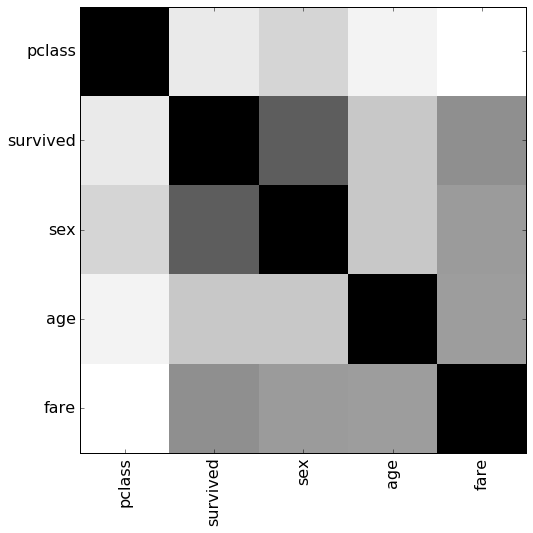

In [816]:
#Set figure size
plt.figure(figsize=(10,8))
#Specify we would like a heatmap
plt.imshow(correlation_matrix, interpolation = 'nearest', cmap = 'Greys')
#Specify the x and y labels
plt.xticks(range(5), titanic_df.columns, rotation = 90, fontsize = 16)
plt.yticks(range(5), titanic_df.columns, fontsize = 16)

# Let's dig into the data further

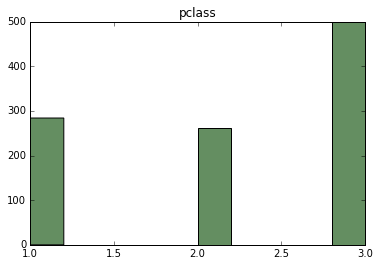

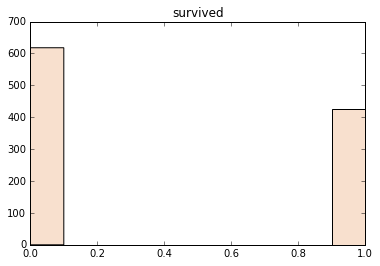

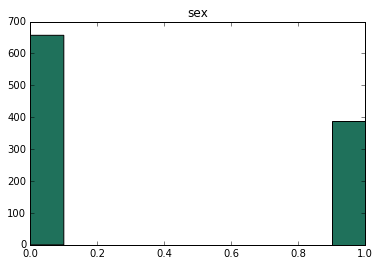

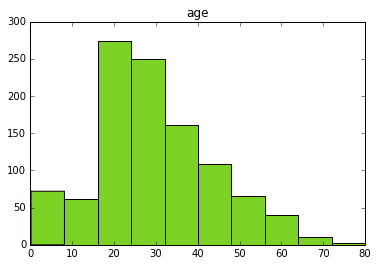

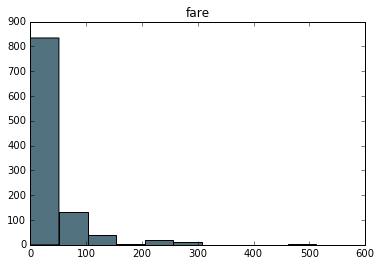

In [817]:
#for each column, draw a historgram of the distribution
for field in titanic_df.columns:
    plt.clf()
    plt.hist(titanic_df[field], color = np.random.rand(3,1))
    plt.title(field)
    plt.show()

# Similarity Between 2 Passengers

In [818]:
#Further subset the dataframe
titanic_df = titanic_df[['sex', 'age', 'fare', 'survived']]

In [819]:
titanic_df

,sex,age,fare,survived
0,0,25.0,55.4417,1.0
1,0,47.0,25.5875,0.0
2,0,54.0,55.4417,1.0
3,1,38.0,71.2833,1.0
4,0,21.0,77.2875,0.0
5,0,20.0,7.8542,0.0
6,0,48.0,7.8542,0.0
7,1,35.0,52.0000,1.0
8,0,54.0,51.8625,0.0
9,1,33.0,20.5750,1.0


In [820]:
#Normalize age
titanic_df['n_age'] = titanic_df.age.apply(lambda x: (x-titanic_df.age.mean())/titanic_df.age.std())

In [821]:
#Take the log of fare
titanic_df['logfare'] = titanic_df.fare.apply(lambda x: np.log(x))

(array([   3.,  294.,  199.,  110.,  197.,   83.,   81.,   34.,   32.,    4.]),
 array([ 1.15398392,  1.66248227,  2.17098062,  2.67947896,  3.18797731,
         3.69647565,  4.204974  ,  4.71347235,  5.22197069,  5.73046904,
         6.23896739]),
 <a list of 10 Patch objects>)

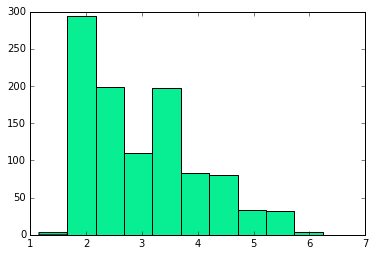

In [822]:
#Draw the histogram of logfare
plt.hist(titanic_df[np.isfinite(titanic_df.logfare)].logfare, color = np.random.rand(3,1))

In [823]:
#a log transformation will cause 0 --> -infinify
titanic_df = titanic_df[np.isfinite(titanic_df.logfare)]

In [824]:
#Now normalize the log of fare
titanic_df['n_logfare'] = titanic_df.logfare.apply(lambda x: (x-titanic_df.logfare.mean())/titanic_df.logfare.std())

C:\Users\Ritvik\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [825]:
titanic_df

,sex,age,fare,survived,n_age,logfare,n_logfare
0,0,25.0,55.4417,1.0,-0.337186,4.015332,1.011016
1,0,47.0,25.5875,0.0,1.191739,3.242104,0.216228
2,0,54.0,55.4417,1.0,1.678215,4.015332,1.011016
3,1,38.0,71.2833,1.0,0.566270,4.266662,1.269354
4,0,21.0,77.2875,0.0,-0.615172,4.347532,1.352479
5,0,20.0,7.8542,0.0,-0.684669,2.061048,-0.997760
6,0,48.0,7.8542,0.0,1.261235,2.061048,-0.997760
7,1,35.0,52.0000,1.0,0.357780,3.951244,0.945141
8,0,54.0,51.8625,0.0,1.678215,3.948596,0.942419
9,1,33.0,20.5750,1.0,0.218787,3.024077,-0.007879


In [826]:
#Create the dataframe we will use for machine learning
sim_df = titanic_df[['survived', 'sex', 'n_age', 'n_logfare']]

In [827]:
#Randomly sample 600 people from the dataset
lim_sim_df = sim_df.sample(600).reset_index()

In [828]:
#initialize our similarity matrix
sim_mtx = np.zeros(shape=(len(lim_sim_df), len(lim_sim_df)))

In [829]:
#Get a list of who survived and who didn't from our 600
surv_list = lim_sim_df.survived

In [830]:
%%time
#populate the similarity matrix
for i in range(len(sim_mtx)):
    if i%100 == 0:
            print i
    v1 = lim_sim_df.iloc[i]
    for j in range(i, len(sim_mtx)):
        norm = np.exp(-np.linalg.norm(v1 - lim_sim_df.iloc[j]))
        sim_mtx[i,j] = norm
        sim_mtx[j,i] = norm
        

0
100
200
300
400
500
Wall time: 58.5 s


# Manual Machine Learning (KNN)

In [831]:
#our test set will be 15%
pred_size = int(0.15*len(sim_mtx))
print pred_size

90


In [832]:
#make our predictions based on a majority of the relevant neighbors
pred_manual = []
for i in range(pred_size):
    indices_to_use = sorted(range(pred_size, len(sim_mtx)), key=lambda j: sim_mtx[i][j])
    indices_to_use = indices_to_use[-15:]
    sim_list = surv_list[indices_to_use].tolist()
    mode = max(set(sim_list), key=sim_list.count)
    pred_manual.append(mode)

In [833]:
sum(((pred_manual - surv_list[:pred_size]) == 0))/float(pred_size)

0.52222222222222225

# Using SciKitLearn

In [834]:
#initialize the KNN
neigh = KNeighborsClassifier(n_neighbors=149)

In [835]:
pred_size = int(0.15*len(titanic_df))
auto_surv_list = titanic_df.survived
print pred_size

155


In [836]:
for feat_list in [['sex'], ['age'], ['fare'], ['sex', 'age'], ['sex', 'fare'], ['age', 'fare'], ['sex', 'fare', 'age']]:
    #fit the model with the training data
    neigh.fit(titanic_df[feat_list][pred_size:].as_matrix(), titanic_df['survived'][pred_size:]) 
    pred_auto = neigh.predict(titanic_df[feat_list][:pred_size].as_matrix())
    print feat_list
    print sum(((pred_auto - auto_surv_list[:pred_size]) == 0))/float(pred_size)

['sex']
0.774193548387
['age']
0.6
['fare']
0.638709677419
['sex', 'age']
0.612903225806
['sex', 'fare']
0.658064516129
['age', 'fare']
0.638709677419
['sex', 'fare', 'age']
0.638709677419


# What is the Best k?

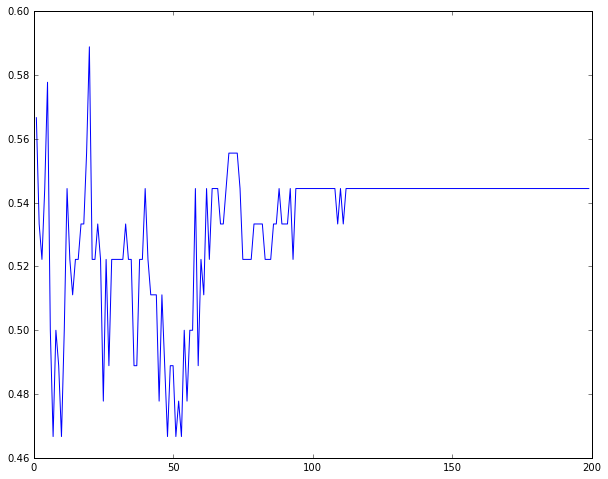

In [837]:
#Graph accuracy vs k for our manual KNN
k_list = []
pred_size = int(0.15*len(sim_mtx))

for k in range(1, 200):
    pred_manual = []
    for i in range(pred_size):
        sim_list = surv_list[sorted(range(pred_size, len(sim_mtx)), key=lambda j: sim_mtx[i][j])[-k:]].tolist()
        pred_manual.append(max(set(sim_list), key=sim_list.count))
    acc = sum(((pred_manual - surv_list[:pred_size]) == 0))/float(pred_size)
    k_list.append(acc)
plt.figure(figsize=(10,8))
plt.plot(range(1,200), k_list)

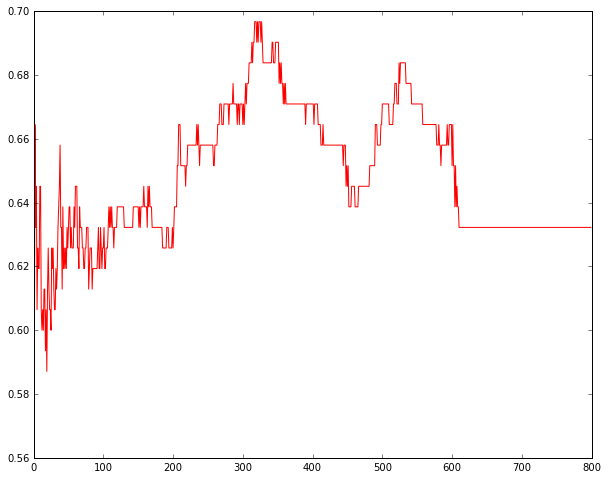

In [838]:
#Graph accuracy vs k for SKL KNN
k_list_auto = []
pred_size = int(0.15*len(titanic_df))
feat_list = ['sex', 'age', 'fare']
for k in range(1,800):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(titanic_df[feat_list][pred_size:].as_matrix(), titanic_df['survived'][pred_size:]) 
    pred_auto = neigh.predict(titanic_df[feat_list][:pred_size].as_matrix())
    acc = sum(((pred_auto - auto_surv_list[:pred_size]) == 0))/float(pred_size)
    k_list_auto.append(acc)
plt.figure(figsize=(10,8))
plt.plot(range(1,800), k_list_auto, color = 'r')

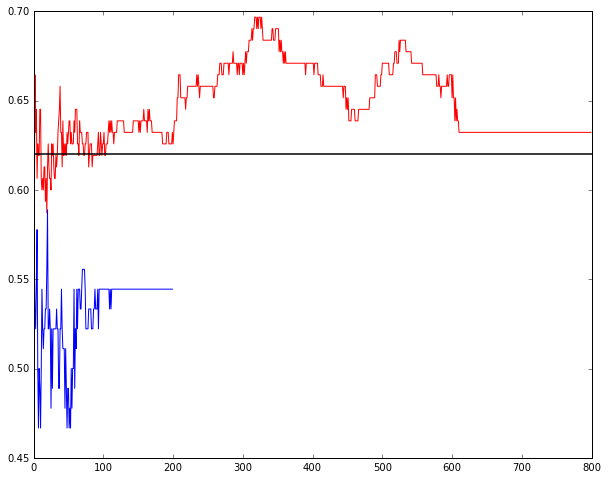

In [839]:
#Side by side
plt.figure(figsize=(10,8))
plt.plot(range(1,800), k_list_auto, color = 'red')
plt.plot(range(1,200), k_list, color = 'blue')
plt.axhline(0.62, color = 'k', linewidth = 1.5)

# There's more than one way to measure success

In [840]:
#define precision and recall function
def precision_recall(pred, true):
    pred = np.asarray(pred)
    true = np.asarray(true)
    if (sum(pred+true == 2) + sum(pred-true == 1)) != 0:
        precision = float(sum(pred+true == 2))/(sum(pred+true == 2) + sum(pred-true == 1))
    else:
        precision = 0
    if (sum(pred+true == 2) + sum(pred-true == -1)) != 0:
        recall = float(sum(pred+true == 2))/(sum(pred+true == 2) + sum(pred-true == -1))
    else:
        recall = 0
    return (precision, recall)

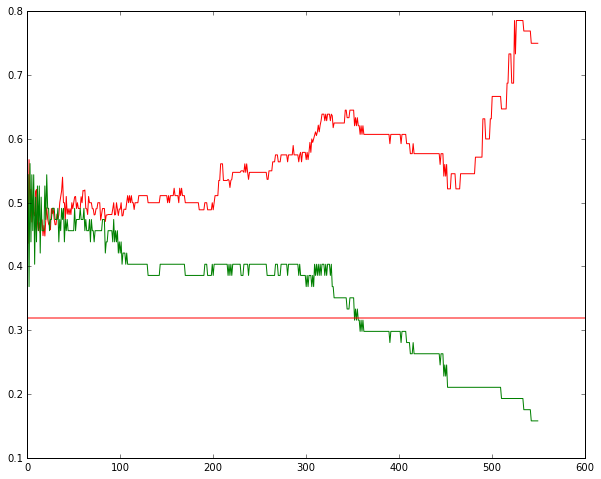

In [841]:
#Graph precision and recall vs k for SKL KNN
k_list_auto = []
pred_size = int(0.15*len(titanic_df))
feat_list = ['sex', 'age', 'fare']
for k in range(1,550):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(titanic_df[feat_list][pred_size:].as_matrix(), titanic_df['survived'][pred_size:]) 
    pred_auto = neigh.predict(titanic_df[feat_list][:pred_size].as_matrix())
    p_r = precision_recall(pred_auto, auto_surv_list[:pred_size])
    k_list_auto.append(p_r)
plt.figure(figsize=(10,8))
plt.plot(range(1,550), [i[0] for i in k_list_auto], color = 'r')
plt.plot(range(1,550), [i[1] for i in k_list_auto], color = 'g')

plt.axhline(0.32, color = 'red', linewidth=2, alpha = 0.5)

# Let's finish with a bunch of other classifiers

In [842]:
#A magical loop
pred_size = int(0.15*len(titanic_df))
feat_list = ['sex', 'age', 'fare']
clfs = {
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'GB': GradientBoostingClassifier(),
    'ET': ExtraTreesClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=300),
    'AB': AdaBoostClassifier()
}

for clf_name in clfs.keys():
    print clf_name
    clf = clfs[clf_name]
    clf.fit(titanic_df[feat_list][pred_size:].as_matrix(), titanic_df['survived'][pred_size:]) 
    pred_auto = clf.predict(titanic_df[feat_list][:pred_size].as_matrix())

    acc = sum(((pred_auto - auto_surv_list[:pred_size]) == 0))/float(pred_size)
    print 'Accuracy: ', acc
    p_r = precision_recall(pred_auto, auto_surv_list[:pred_size])
    print 'Precision: ', p_r[0]
    print 'Recall: ', p_r[1]
    print '----------------------------------------------'

KNN
Accuracy:  0.664516129032
Precision:  0.567567567568
Recall:  0.368421052632
----------------------------------------------
AB
Accuracy:  0.754838709677
Precision:  0.679245283019
Recall:  0.631578947368
----------------------------------------------
RF
Accuracy:  0.735483870968
Precision:  0.66
Recall:  0.578947368421
----------------------------------------------
LR
Accuracy:  0.78064516129
Precision:  0.734693877551
Recall:  0.631578947368
----------------------------------------------
GB
Accuracy:  0.748387096774
Precision:  0.673076923077
Recall:  0.614035087719
----------------------------------------------
ET
Accuracy:  0.690322580645
Precision:  0.581818181818
Recall:  0.561403508772
----------------------------------------------


# Beware of Machine Learning Pitfalls

In [843]:
#WRONG WRONG WRONG!!!!!!
pred_size = int(0.15*len(titanic_df))
feat_list = ['sex', 'age', 'fare']
clfs = {
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'GB': GradientBoostingClassifier(),
    'ET': ExtraTreesClassifier(),
    'KNN': KNeighborsClassifier(),
    'AB': AdaBoostClassifier()
}

for clf_name in clfs.keys():
    print clf_name + ' - WRONG!'
    clf = clfs[clf_name]
    clf.fit(titanic_df[feat_list].as_matrix(), titanic_df['survived']) 
    pred_auto = clf.predict(titanic_df[feat_list].as_matrix())

    acc = sum(((pred_auto - auto_surv_list) == 0))/float(len(titanic_df))
    print 'Accuracy: ', acc
    p_r = precision_recall(pred_auto, auto_surv_list)
    print 'Precision: ', p_r[0]
    print 'Recall: ', p_r[1]
    print '----------------------------------------------'

KNN - WRONG!
Accuracy:  0.771456123433
Precision:  0.742268041237
Recall:  0.677647058824
----------------------------------------------
AB - WRONG!
Accuracy:  0.790742526519
Precision:  0.738532110092
Recall:  0.757647058824
----------------------------------------------
RF - WRONG!
Accuracy:  0.955641272903
Precision:  0.963325183374
Recall:  0.927058823529
----------------------------------------------
LR - WRONG!
Accuracy:  0.77531340405
Precision:  0.738805970149
Recall:  0.698823529412
----------------------------------------------
GB - WRONG!
Accuracy:  0.854387656702
Precision:  0.862433862434
Recall:  0.767058823529
----------------------------------------------
ET - WRONG!
Accuracy:  0.976856316297
Precision:  0.995061728395
Recall:  0.948235294118
----------------------------------------------
